In [6]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l1 = "social-power-nba/nba_2017_salary.csv"
l2 = "https://www.basketball-reference.com/leagues/NBA_2018_per_game.html"

In [3]:
## Function to merge the two datasets I am using
def mergedfs(link1, link2):
    df1 = pd.read_csv(l1)
    df2 = pd.read_html(l2)
    df2 = df2[0]
    ## There are some players that got traded so the data tracked will be with the team 
    ## a player was on for the longest time 
    df2 = df2.drop_duplicates(subset='Rk', keep='first')
    comp = df2.merge(df1, how='inner', left_on='Player', right_on='NAME')
    comp = comp.drop(['Rk', 'POSITION', 'NAME'], axis = 1)
    comp = comp.drop_duplicates(subset = 'Player', keep='first')
    return comp


In [7]:
# merges the datasets and saves to variable "comp"
l1 = "social-power-nba/nba_2017_salary.csv"
l2 = "https://www.basketball-reference.com/leagues/NBA_2018_per_game.html"
comp = mergedfs(l1, l2)

Question 1: Do NBA players that receive higher salaries have better statistics during a season?

In [6]:
## Set up numbers trying to make each group size as even as possible 
def q1help(df):
    if df > 8350000:
        return 'Large'
    elif df > 2700000:
        return 'Medium'
    else: 
        return 'Small'

In [7]:
q1 = comp.copy()
# Create new column that catagorizes player salary as small/medium/large
q1['Sal Size'] = q1['SALARY'].apply(q1help)
# Get only relevant information 
q1info = q1[['AST', 'STL', 'BLK', 'TRB', 'PTS', 'Sal Size']]
# Make columns numbers so they can be manipulated 
q1info[['AST', 'STL', 'BLK', 'TRB', 'PTS']] = q1info[['AST', 'STL', 'BLK', 'TRB', 'PTS']].apply(pd.to_numeric)
# Group by thte new column to get information on each salary range 
inf = q1info.groupby('Sal Size').mean()
inf


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,AST,STL,BLK,TRB,PTS
Sal Size,,,,,
Large,2.882407,0.811111,0.541667,4.825000,12.769444
Medium,1.998165,0.708257,0.414679,3.825688,9.573394
Small,1.482407,0.550926,0.326852,2.911111,6.520370


[]

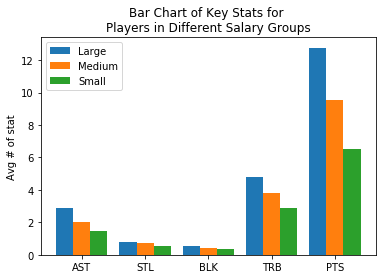

In [8]:
l = list()
m = list()
s = list()
for i, x in inf.iteritems():
    l.append(x[0])
    m.append(x[1])
    s.append(x[2])
i = np.arange(5)
bw = .27
ax = plt.subplot(111)
lar = ax.bar(i-bw, l, bw, label="Large")
med = ax.bar(i, m, bw, label="Medium")
sma = ax.bar(i+bw, s, bw, label="Small")

ax.set_xticklabels(["","AST", "STL", "BLK", "TRB", "PTS"])
ax.legend()
ax.set_ylabel('Avg # of stat')
ax.set_title("Bar Chart of Key Stats for \nPlayers in Different Salary Groups")
ax.plot()

As the chart above shows, in every category players that are given more money preform better when looking at the main 5 overall stats (assists, steals, blocks, rebounds, and points). In every aspect, the amount of money players are making decreases parallel to their statistics per game. 

Question 2: How does a players age impact how much they make, on average?

In [10]:
def q2help(df):
    if int(df) > 33:
        return 'Veteran'
    elif int(df) > 24:
        return 'Prime'
    else: 
        return 'Young'

In [11]:
q2 = comp.copy()
# Apply age catagorizing function to create new column 
q2['Age Group'] = q2['Age'].apply(q2help)
# Only get relevant information
q2info = q2[['Age Group', 'SALARY']]
# Group by the newly created column 
q2df = q2info.groupby('Age Group').mean()
# Change column type to make it manipulatable 
q2df['SALARY'] = q2df['SALARY'].astype('int64')
# Sort the salaries to find the top ones 
q2ans = q2df.sort_values('SALARY', ascending = False)

Text(0.5, 1.0, 'Bar Chart for NBA Players and Their \nPay Reletive to Age for 2017-2018 Season')

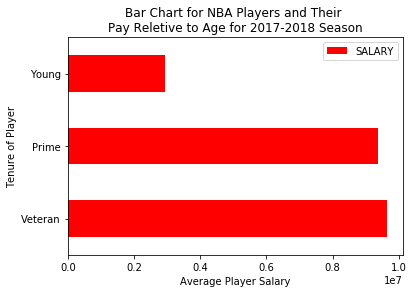

In [13]:
q2ans.plot(kind='barh', colormap='hsv')
plt.ylabel('Tenure of Player')
plt.xlabel('Average Player Salary')
plt.title('Bar Chart for NBA Players and Their \nPay Reletive to Age for 2017-2018 Season')

As shown in the graph above, players veterans get paid the most, players in their prime the second most, and young players the least. This remains true for almost all ages of playrs one wound consdier to be a "veteran" (up until age 40). 

Question 3: Does a teams success during a season correlate to the money that the team spends on its players?

In [14]:
l3 = 'https://www.basketball-reference.com/leagues/NBA_2018_standings.html'
# Get correct tables and change column names to easily concat 
df1 = pd.read_html(l3)[0]
df1 = df1.rename(index=str, columns = {'Eastern Conference': 'Team'})
df2 = pd.read_html(l3)[1]
df2 = df2.rename(index=str, columns = {'Western Conference': 'Team'})
stand = pd.concat([df1, df2])
# Only get relevant information 
stand = stand[['Team', 'W', 'L']]
# Sort by number of wins 
sorted_standings = stand.sort_values(by = 'W', ascending = False).reset_index()

In [15]:
# Change column to have no digits and extraneous characters 
sorted_standings['Team'] = sorted_standings['Team'].apply(lambda x: re.sub(r'\W+', '', x))\
                                                            .apply(lambda y: re.sub("\d+", "", y))

In [16]:
# Get only relevant informaiton from original df 
q3 = comp[['TEAM', 'SALARY']]
# Clean data from original df 
q3['TEAM'] = q3['TEAM'].apply(lambda x: re.sub(r'\W+', '', x))
# Group by newly cleaned column 
q3sal = q3.groupby('TEAM').mean().sort_values('SALARY', ascending = True)
ss2 = q3sal.sort_values('TEAM').reset_index()
# Reset index for visual purposes and drop extraneous columns 
ss = sorted_standings.sort_values('Team').reset_index().drop(columns=['level_0', 'index'])
# Merge the two dataframes, drop extraneous columns, and reset index again
fin = pd.merge(ss, ss2, left_index=True, right_index=True).drop(columns=['TEAM', 'L'])\
                .sort_values('W', ascending=False).reset_index().drop(columns=['index'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


The correlation coefficient is 0.014466382420785287


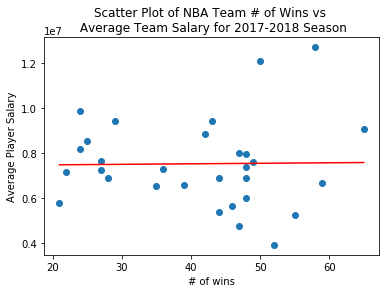

In [17]:
t = list()
s = list()
w = list()
for i, x in fin.iterrows():
    t.append(str(x[0]))
    w.append(int(x[1]))
    s.append(int(x[2]))

plt.scatter(w, s)
plt.xlabel('# of wins')
plt.ylabel('Average Player Salary')
plt.title('Scatter Plot of NBA Team # of Wins vs \n Average Team Salary for 2017-2018 Season')

cc = np.corrcoef(w, s)[1][0]
print('The correlation coefficient is {}'.format(cc))
z = np.polyfit(w, s, 1)
p = np.poly1d(z)
plt.plot(w, p(w), "r-")
plt.show()

This scatter plot proves that there is 0 correlation between the cost of players on an NBA team and how many wins a team is able to get during the regular season. 